# Reinforcement Learning (RL)

[Edward Lu](https://github.com/edwardlu71/notebooks)

- does a wolf in forrest need higher IQ than you to win you?
- what is IQ?


### simple explanation of the concept of Q-learning, one of the RL algorithm

#### RL vs supervised Learning
Reinforcement learning differs from supervised learning in not needing labelled input/output pairs be presented, and in not needing sub-optimal actions to be explicitly corrected. Instead the focus is on finding a balance between exploration (of uncharted territory) and exploitation (of current knowledge).

#### RL is modelless

#### RL is one of three machine learning paradigms: RL, supervised and unsupervised learning, suitable for
- robot control
- elevator scheduling
- telecommunications
- backgammon
- Go (AlphaGo)

### Framework

#### key concepts
- environment (real or simulated environment)
- episode (how many training)
- q table (knowledge book to be generated from training)
- states and actions (knowledge)
- learning rate and discount rate (prudential to absob knowledge from new experience)
- reward (usually negative, closer to 0 means higher reward. simplifieded in this example -1 = every one more step)
- exploration and exploitation, decay rate (evolution)
- discretion of physical quantities (cpu)
- bellman equation (q learning uses the max_future_q in bellman equation. Sarsa uses the exact q of next state here) 
    1. Q learning is off-policy, aggressive
    2. Sarsa is on-policy, conservative
- further study Sarsa lambda (frequency of updating q table, lambda is decay rate)


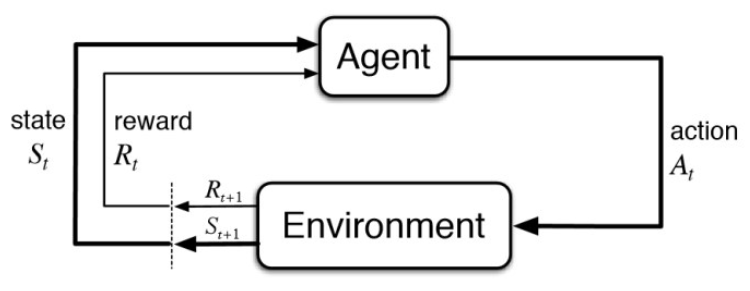


## Goal

### training a car to find newton gravitation law and use it to climb hill


In [1]:
import gym
import numpy as np
import pickle

#### Environment (playground)

In [2]:
# create a environment, car and mountain
# this environment provides the simulation of real world under newton law
env = gym.make("MountainCar-v0")

#### Episodes (learning loops)

In [3]:
# how many rounds to train
EPISODES = 10000

#### Learning rate and discount (learning speed)

In [4]:
# parameters for bellman equation
LEARNING_RATE = 0.1
DISCOUNT = 0.95

In [5]:
# rendering rate for display
SHOW_EVERY = 1000

#### Discretion of observation space (limited computing resource)

In [6]:
# in real world under classical physics understanding, time and space are continues physical quantities
# discrete the observation space
DISCRETE_OS_SIZE = [20, 20] # height and speed
# for gym/MountainCar, env.observation_space.high is a tuple of maximum height and maximum speed
# discrete_os_win_size is the slot size of (height, speed)
discrete_os_win_size = (env.observation_space.high - env.observation_space.low)/DISCRETE_OS_SIZE

In [7]:
# convert continuous state into discrete state.
# this state is a tuple of (height, speed)
def get_discrete_state(state):
    discrete_state = (state - env.observation_space.low)/discrete_os_win_size
    # we use this tuple to look up the 3 Q values for the available actions in the q-table
    return tuple(discrete_state.astype(np.int))

#### Exploration vs Exploitation
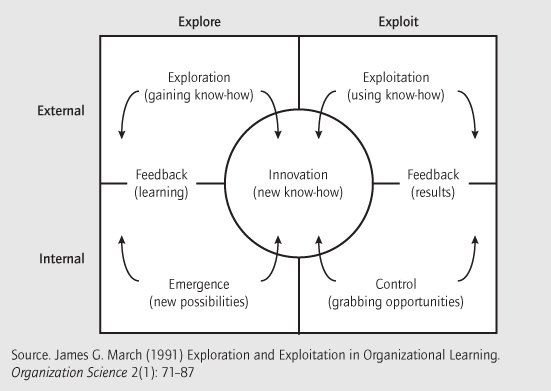

In [8]:
# Exploration/Exploitation settings
# epsilon decays from 1 (exploration) at the first episode
#                  to 0 (exploitation) at the point of half of the episodes
epsilon = 1
START_EPSILON_DECAYING = 1
END_EPSILON_DECAYING = EPISODES//2
epsilon_decay_value = epsilon/(END_EPSILON_DECAYING - START_EPSILON_DECAYING)

#### Q table (knowledge base)

In [9]:
## construct a q-table initiated with randon reward values
# |----------------|--------------------|
# |     states     |      actions       |
# |----------------|--------------------|
# | height | speed | left | nil | right |
q_table = np.random.uniform(low=-2, high=0, size=(DISCRETE_OS_SIZE + [env.action_space.n]))
# q_table.shape = (20, 20, 3), values are negatives

#### Training loop of episodes
the result gained from training is the q-table, which will be serialized to a file in harddisk 

In [10]:
# run the training
for episode in range(EPISODES):
    if episode % SHOW_EVERY == 0:
        print(f"episode {episode}")

    # for every episode, reset the environment and get the initial state
    discrete_state = get_discrete_state(env.reset())
    done = False

    # when the car hasn't reach the flag
    while not done:
        # randomly choose exploitation or exploration when epsilon in between 0 and 1
        if np.random.random() > epsilon:
            # exploitation => get action from Q table
            # find the correspond action with the maximum q value of the state
            action = np.argmax(q_table[discrete_state])
        else:
            # exploration => Get random action
            # one of (0, 1, 2) meaning (left, nil, right)
            action = np.random.randint(0, env.action_space.n)

        # the environment take the selected action and get the new state, reward and done or not
        new_state, reward, done, _ = env.step(action)
        # for q-learning every further step will pay a base penalty of -1 by default
        if reward != -1:
            print(f"reward {reward} at episode {episode}")
        # convert the continuous new state to discrete state
        new_discrete_state = get_discrete_state(new_state)

        # display the story only every x number of episodes
        if episode % SHOW_EVERY == 0:
            #env.render()
            pass

        # If simulation did not end yet after last step - update Q table
        if not done:
            # Maximum possible Q value in next step (for new state)
            max_future_q = np.max(q_table[new_discrete_state])

            # Current Q value (for current state and performed action)
            current_q = q_table[discrete_state + (action,)]

            # bellman equation to calculate the new q value of the state
            new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)

            # Update Q table with new Q value
            q_table[discrete_state + (action,)] = new_q

        # Simulation ended (for any reson) - if goal position is archived - update Q value with reward directly
        elif new_state[0] >= env.goal_position:
            q_table[discrete_state + (action,)] = 0 # 0 is highest

        discrete_state = new_discrete_state

    # Decaying is being done every episode if episode number is within decaying range
    if END_EPSILON_DECAYING >= episode >= START_EPSILON_DECAYING:
        epsilon -= epsilon_decay_value

env.close()

episode 0
episode 1000
episode 2000
episode 3000
episode 4000
episode 5000
episode 6000
episode 7000
episode 8000
episode 9000
episode 10000
episode 11000
episode 12000
episode 13000
episode 14000
episode 15000
episode 16000
episode 17000
episode 18000
episode 19000
episode 20000
episode 21000
episode 22000
episode 23000
episode 24000


#### save the q-table to a file

In [16]:
print(f"the shape of q-table (height, speed, actions): {q_table.shape}")
print(f"example of 3 actions for a height and a speed: {q_table[10][10]}")
with open('qtable.data', 'wb') as f:
    pickle.dump(q_table, f)

the shape of q-table (height, speed, actions): (20, 20, 3)
example of 3 actions for a height and a speed: [-19.61675063 -19.7788409  -19.77896838]


## Script to test the game with the generated q-table

In [ ]:
import gym
import numpy as np
import pickle
from time import sleep

# parameters for bellman equation
env = gym.make("MountainCar-v0")

# discrete the observation space
DISCRETE_OS_SIZE = [20, 20] # height and speed
# for gym/MountainCar, env.observation_space.high is a tuple of maximum height and maximum speed
# discrete_os_win_size is the slot size of (height, speed)
discrete_os_win_size = (env.observation_space.high - env.observation_space.low)/DISCRETE_OS_SIZE


# convert continuous state into discrete state.
def get_discrete_state(state):
    discrete_state = (state - env.observation_space.low)/discrete_os_win_size
    # we use this tuple to look up the 3 Q values for the available actions in the q-table
    return tuple(discrete_state.astype(np.int))

# load a well trained q-table
with open('qtable.data', 'rb') as f:
    q_table = pickle.load(f)

while True:
    discrete_state = get_discrete_state(env.reset())
    done = False

    # when the car hasn't reach the flag
    while not done:
        action = np.argmax(q_table[discrete_state])

        new_state, reward, done, _ = env.step(action)
        new_discrete_state = get_discrete_state(new_state)

        env.render()
        discrete_state = new_discrete_state

        if new_state[0] >= env.goal_position:
            break

    sleep(2)

env.close()